In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("cleaned_train_data.csv")
df_test = pd.read_csv("cleaned_test_data.csv")

In [3]:
df_test["SalePrice"] = df_train["SalePrice"].mean()

In [4]:
baseline_submission = df_test[["Id", "SalePrice"]]

In [5]:
baseline_submission.set_index("Id", inplace = True)

In [6]:
baseline_submission.to_csv("data/baseline.csv", index = True)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<Axes: >

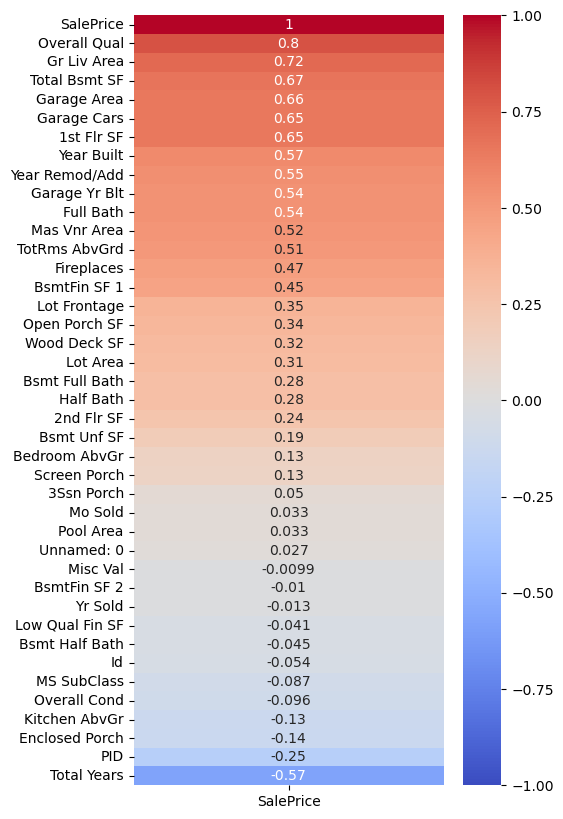

In [8]:
plt.figure(figsize = (5,10))
sns.heatmap(df_train.corr(numeric_only = True)[["SalePrice"]].sort_values(by = "SalePrice", ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = "coolwarm",
            annot = True)

In [9]:
features = ["Overall Qual"]

X = df_train[features]
y = df_train["SalePrice"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.score(X_train, y_train)

0.6435519428127128

In [14]:
lr.score(X_test, y_test)

0.6530718754262215

In [15]:
lr.fit(X, y)

LinearRegression()

In [16]:
df_test["SalePrice"] = lr.predict(df_test[features])

In [17]:
submission1 = df_test [["Id", "SalePrice"]]

In [18]:
submission1.to_csv("data/submission1.csv")

> This gave a RMSE score of 48840.92. This means, on average, with using just the overall quality score as our one feature, our model was off by 48840.92. This beat the baseline!

In [20]:
df_train["Lot Frontage"].fillna(df_train["Lot Frontage"].mean(), inplace = True)

df_test["Lot Frontage"].fillna(df_train["Lot Frontage"].mean(), inplace = True)

In [21]:
features = ["Overall Qual", "Lot Frontage"]

X = df_train[features]
y = df_train["SalePrice"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.score(X_train, y_train)

0.68337824140799

In [26]:
lr.score(X_test, y_test)

0.7079099899589212

In [27]:
lr.fit(X,y)

LinearRegression()

In [28]:
df_test["SalePrice"] = lr.predict(df_test[features])

In [29]:
submission2 = df_test[["Id", "SalePrice"]]

In [30]:
submission2.set_index("Id", inplace = True)

In [31]:
submission2.to_csv("data/submission2.csv")

> This gave a RMSE score of 46130.42.

In [33]:
df_train.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending = False).index

Index(['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Veenker', 'Timber',
       'Somerst', 'ClearCr', 'Crawfor', 'CollgCr', 'Blmngtn', 'NWAmes',
       'Gilbert', 'Greens', 'SawyerW', 'Mitchel', 'NAmes', 'Blueste',
       'NPkVill', 'Sawyer', 'Landmrk', 'SWISU', 'Edwards', 'BrkSide',
       'OldTown', 'BrDale', 'IDOTRR', 'MeadowV'],
      dtype='object', name='Neighborhood')

In [34]:
df_train_dummy = pd.get_dummies(df_train, columns = ["Neighborhood"], dtype = int, drop_first = True)

df_test_dummy = pd.get_dummies(df_test, columns = ["Neighborhood"], dtype = int, drop_first = True)

In [35]:
set(df_train_dummy.columns) - set(df_test_dummy.columns)

df_test_dummy = df_test_dummy.reindex(columns = df_train_dummy.columns, fill_value = 0)

set(df_train_dummy.columns) - set(df_test_dummy.columns)

set()

<Axes: >

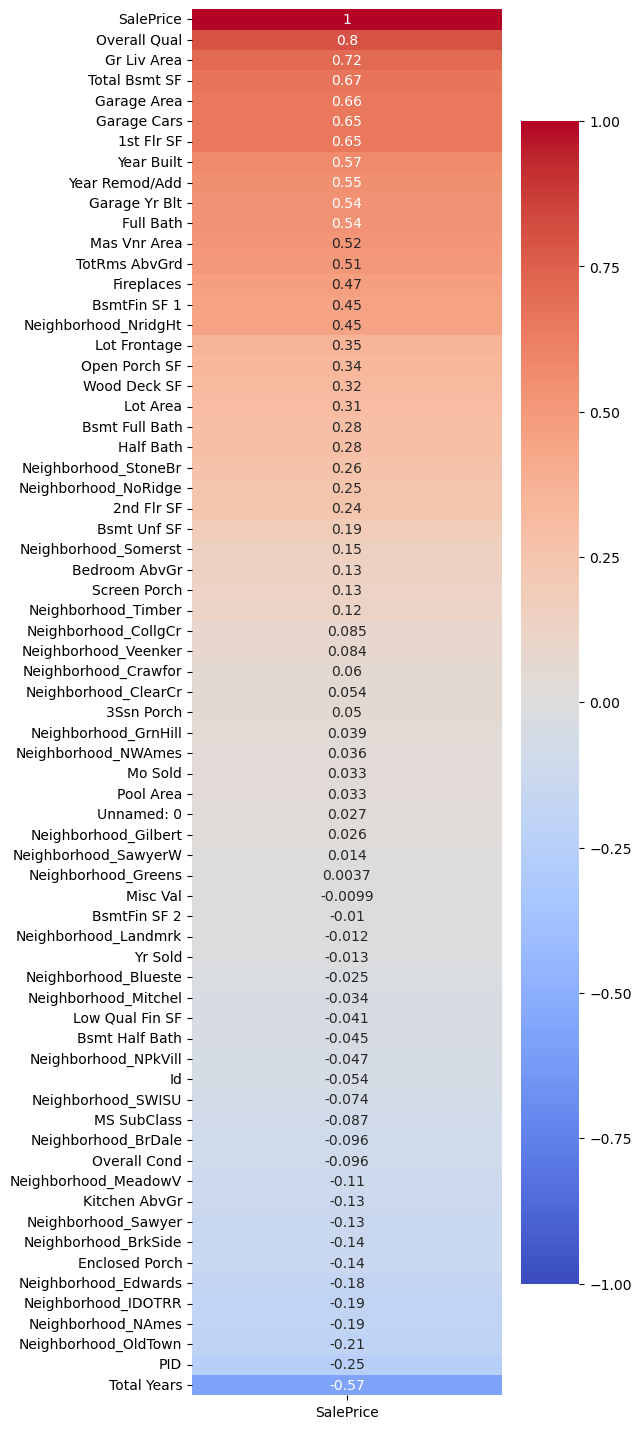

In [36]:
plt.figure(figsize = (5, 18))
sns.heatmap(df_train_dummy.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)

In [37]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt"]

X = df_train_dummy[features]
y = df_train_dummy["SalePrice"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr.score(X_train, y_train)

0.6945204541313303

In [42]:
lr.score(X_test, y_test)

0.7320403554996169

In [43]:
lr.fit(X,y)

LinearRegression()

In [44]:
df_test_dummy["SalePrice"] = lr.predict(df_test_dummy[features])

In [45]:
submission3 = df_test_dummy[["Id", "SalePrice"]]

In [46]:
submission3.set_index("Id", inplace = True)

In [47]:
submission3

,SalePrice
Id,
2658,174545.802735
2718,134391.316962
2414,205833.907670
1989,127670.637688
625,174252.304958
...,...
1662,183118.685797
1234,190912.215854
1373,123773.872660


In [48]:
submission3.to_csv("data/submission3.csv")

> This improved our RMSE score of 45476.25.

In [50]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area"]

X = df_train_dummy[features]
y = df_train_dummy["SalePrice"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.score(X_train, y_train)

0.7732211677107664

In [55]:
lr.score(X_test, y_test)

0.7995836738352613

In [56]:
lr.fit(X,y)

LinearRegression()

In [57]:
df_test_dummy["SalePrice"] = lr.predict(df_test_dummy[features])

In [58]:
submission4 = df_test_dummy[["Id", "SalePrice"]]

In [59]:
submission4.set_index("Id", inplace = True)

In [60]:
submission4.to_csv("data/submission4.csv")

> This gave a RMSE score of 37779.75, getting closer!

In [62]:
df_train.groupby("Year Built")["SalePrice"].mean().sort_values(ascending = False).index

Index([1892, 2008, 1893, 2009, 2010, 2006, 1981, 2007, 2001, 2005,
       ...
       1901, 1920, 1910, 1924, 1898, 1946, 1922, 1875, 1913, 1896],
      dtype='int64', name='Year Built', length=113)

<Axes: xlabel='Year Built', ylabel='SalePrice'>

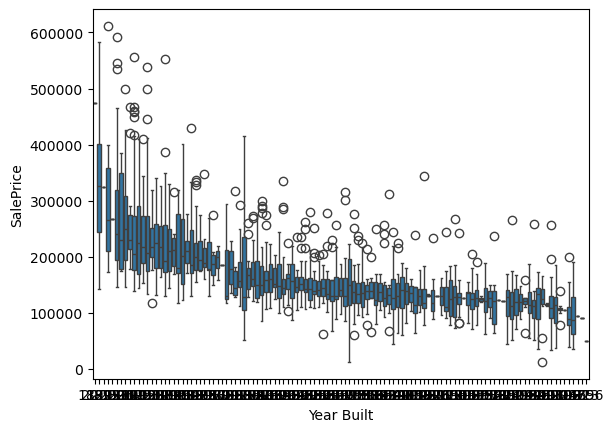

In [63]:
#plt.figure(figsize = (10,15))
sns.boxplot(data = df_train,
           y = "SalePrice",
           x = "Year Built",
           order = df_train.groupby("Year Built")["SalePrice"].mean().sort_values(ascending = False).index)

In [64]:
df_train_dummy_1 = pd.get_dummies(df_train_dummy, columns = ["Year Built"], dtype = int, drop_first = True)

df_test_dummy_1 = pd.get_dummies(df_test_dummy, columns = ["Year Built"], dtype = int, drop_first = True)

In [65]:
set(df_train_dummy_1.columns) - set(df_test_dummy_1.columns)

{'Year Built_1875',
 'Year Built_1879',
 'Year Built_1880',
 'Year Built_1893',
 'Year Built_1895',
 'Year Built_1896',
 'Year Built_1898',
 'Year Built_1901',
 'Year Built_1911',
 'Year Built_1913',
 'Year Built_1929',
 'Year Built_1942'}

In [66]:
df_test_dummy_1 = df_test_dummy_1.reindex(columns = df_train_dummy_1.columns, fill_value = 0)

In [67]:
set(df_train_dummy_1.columns) - set(df_test_dummy_1.columns)

set()

<Axes: >

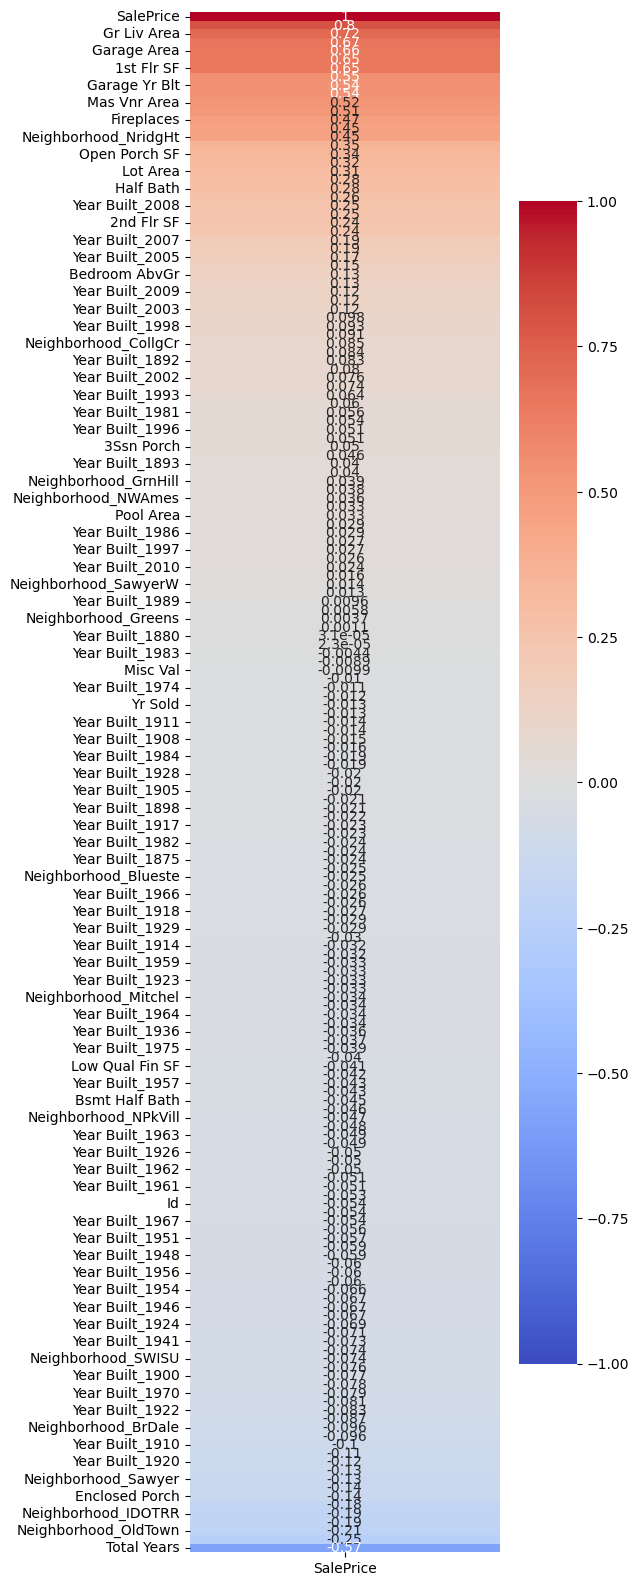

In [68]:
plt.figure(figsize = (5, 20))
sns.heatmap(df_train_dummy_1.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)

In [69]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area", "Year Built_2008"]

X = df_train_dummy_1[features]
y = df_train_dummy_1["SalePrice"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
lr.score(X_train, y_train)

0.7803169543045312

In [74]:
lr.score(X_test, y_test)

0.8023796179239584

In [75]:
lr.fit(X,y)

LinearRegression()

In [76]:
df_test_dummy_1["SalePrice"] = lr.predict(df_test_dummy_1[features])

In [77]:
submission5 = df_test_dummy_1[["Id", "SalePrice"]]

In [78]:
submission5.set_index("Id", inplace = True)

In [79]:
submission5.to_csv("data/submission5.csv")

> This gave a RMSE score of 37894.94.

In [81]:
df_train_dummy["Total Years"] = df_train_dummy["Yr Sold"] - df_train_dummy["Year Built"]

df_test_dummy["Total Years"] = df_test_dummy["Yr Sold"] - df_test_dummy["Year Built"]

In [82]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area", "Total Years"]

X = df_train_dummy[features]
y = df_train_dummy["SalePrice"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(X_train, y_train)

LinearRegression()

In [86]:
lr.score(X_train, y_train)

0.7939145454925984

In [87]:
lr.score(X_test, y_test)

0.8177393028596032

In [88]:
lr.fit(X,y)

LinearRegression()

In [89]:
df_test_dummy["SalePrice"] = lr.predict(df_test_dummy[features])

In [90]:
submission6 = df_test_dummy[["Id", "SalePrice"]]

In [91]:
submission6.set_index("Id", inplace = True)

In [92]:
submission6.to_csv("data/submission6.csv")

> This improved our RMSE score of 36161.39.

In [94]:
df_train_dummy_2 = pd.get_dummies(df_train_dummy, columns = ["Year Remod/Add"], dtype = int, drop_first = True)

df_test_dummy_2 = pd.get_dummies(df_test_dummy, columns = ["Year Remod/Add"], dtype = int, drop_first = True)

<Axes: >

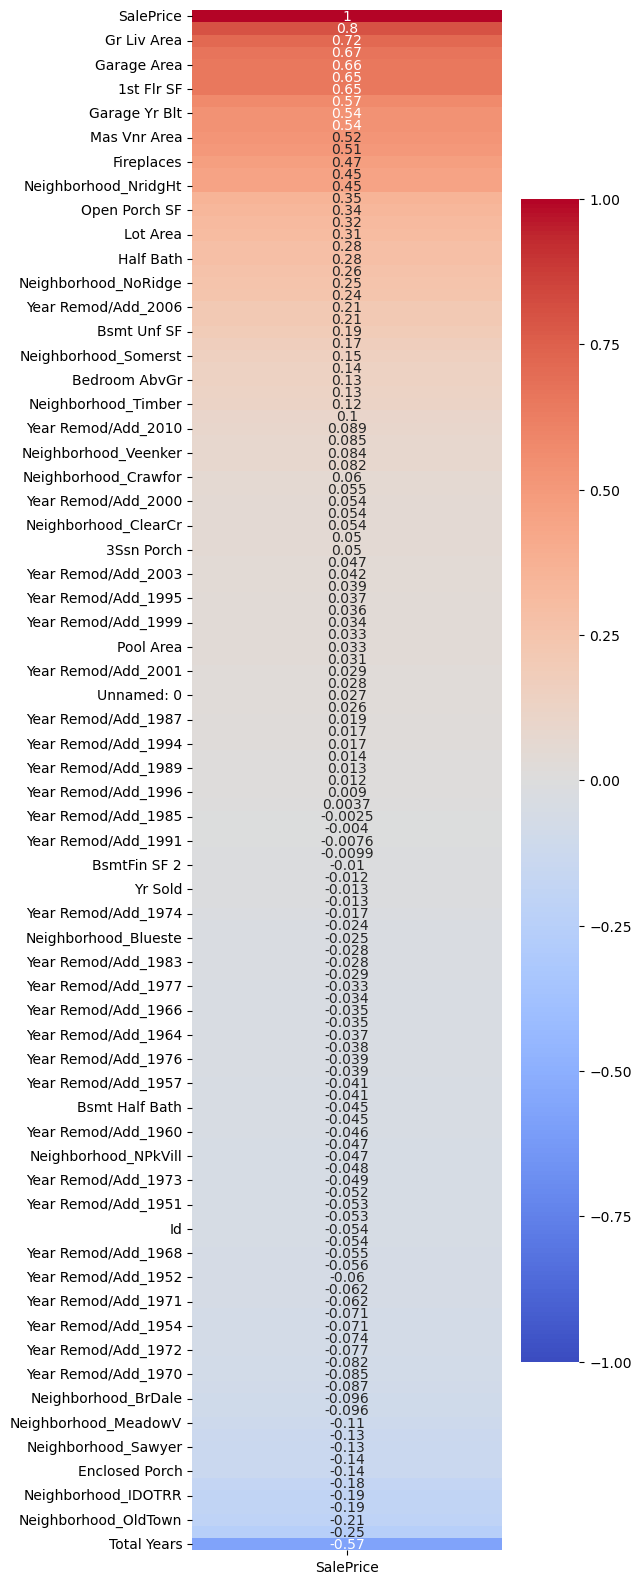

In [95]:
plt.figure(figsize = (5, 20))
sns.heatmap(df_train_dummy_2.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)

In [97]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area", "Total Years", "Year Remod/Add_2006"]

X = df_train_dummy_2[features]
y = df_train_dummy_2["SalePrice"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [101]:
lr = LinearRegression()

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
lr.score(X_train, y_train)

0.794683228198118

In [107]:
lr.score(X_test, y_test)

0.8179044963887809

In [109]:
lr.fit(X,y)

LinearRegression()

In [111]:
df_test_dummy_2["SalePrice"] = lr.predict(df_test_dummy_2[features])

In [113]:
submission7 = df_test_dummy[["Id", "SalePrice"]]

In [115]:
submission7.set_index("Id", inplace = True)

In [117]:
submission7.to_csv("data/submission7.csv")

> Our RMSE score of 36161.39 stayed the same.

In [133]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area", "Total Years", "Year Remod/Add_1970"]

X = df_train_dummy_2[features]
y = df_train_dummy_2["SalePrice"]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [137]:
lr = LinearRegression()

In [139]:
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
lr.score(X_train, y_train)

0.7939280070740617

In [143]:
lr.score(X_test, y_test)

0.8175870428720466

In [145]:
lr.fit(X,y)

LinearRegression()

In [147]:
df_test_dummy_2["SalePrice"] = lr.predict(df_test_dummy_2[features])

In [149]:
submission8 = df_test_dummy[["Id", "SalePrice"]]

In [151]:
submission8.set_index("Id", inplace = True)

In [155]:
submission8.to_csv("data/submission8.csv")

> Our RMSE score of 36161.39 stayed the same.

In [163]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area", "Total Years", "Mas Vnr Area"]

X = df_train_dummy[features]
y = df_train_dummy["SalePrice"]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [169]:
lr = LinearRegression()

In [171]:
lr.fit(X_train, y_train)

LinearRegression()

In [173]:
lr.score(X_train, y_train)

0.8024089938865163

In [175]:
lr.score(X_test, y_test)

0.8255178870687105

In [177]:
lr.fit(X,y)

LinearRegression()

In [181]:
df_test_dummy["SalePrice"] = lr.predict(df_test_dummy[features])

In [183]:
submission9 = df_test_dummy[["Id", "SalePrice"]]

In [185]:
submission9.set_index("Id", inplace = True)

In [187]:
submission9.to_csv("data/submission9.csv")

> This improved our RMSE score of 35561.67.

In [191]:
features = ["Overall Qual", "Lot Frontage", "Neighborhood_NridgHt", "Gr Liv Area", "Total Years", "Mas Vnr Area", "Garage Area"]

X = df_train_dummy[features]
y = df_train_dummy["SalePrice"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [193]:
lr = LinearRegression()

In [194]:
lr.fit(X_train, y_train)

LinearRegression()

In [195]:
lr.score(X_train, y_train)

0.8133480829731637

In [196]:
lr.score(X_test, y_test)

0.8316864566282344

In [197]:
lr.fit(X,y)

LinearRegression()

In [198]:
df_test_dummy["SalePrice"] = lr.predict(df_test_dummy[features])

In [199]:
submission10 = df_test_dummy[["Id", "SalePrice"]]

In [200]:
submission10.set_index("Id", inplace = True)

In [201]:
submission10.to_csv("data/submission10.csv")

> This improved our RMSE score of 35224.37.